In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/home/rmyeid/notebooks/compsocial/online_learning/data/HMXPC13_DI_v2_5-14-14.csv')

In [3]:
df.head()

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,NaN,NaN,NaN,0,2012-12-19,2013-11-17,NaN,9,NaN,NaN,0,NaN,1
1,HarvardX/CS50x/2012,MHxPC130442623,1,1,0,0,United States,NaN,NaN,NaN,0,2012-10-15,NaN,NaN,9,NaN,1,0,NaN,1
2,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2013-02-08,2013-11-17,NaN,16,NaN,NaN,0,NaN,1
3,HarvardX/CS50x/2012,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2012-09-17,NaN,NaN,16,NaN,NaN,0,NaN,1
4,HarvardX/ER22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2012-12-19,NaN,NaN,16,NaN,NaN,0,NaN,1


## Engagement

In [4]:
df["engagement"] = df.registered
df.loc[df.registered == 1, "engagement"] =  2.0
df.loc[df.viewed == 1, "engagement"] =  1.0
df.loc[df.explored == 1, "engagement"] = 3.0
df.loc[df.certified == 1, "engagement"] = 4.0

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

## Material Engagement

In [6]:
df.nchapters.fillna(0, inplace=True)
df.nplay_video.fillna(0, inplace=True)
df.loc[df.nchapters.values > 20, "nchapters"] = 20
df.loc[df.nplay_video > 200, "nplay_video"] = 200

In [7]:
df["course_material_engagement"] = df.nchapters + df.nplay_video
df.loc[df.course_material_engagement < 0, "course_material_engagement"] = 0

## Grade

In [8]:
df.grade.fillna(0, inplace=True)
if " " in df.grade.values:
  df.loc[df.grade == " ", "grade"] = 0
df.grade = df.grade.values.astype(np.float) * 100 
df.loc[df.grade > 100, "grade"] = 100

### Load Course Information

In [9]:
df["course_category"] = pd.Series(np.random.randn(len(df.index)), index=df.index)

In [10]:
from StringIO import StringIO  # got moved to io in python3.
import requests

In [11]:
r = requests.get('https://docs.google.com/spreadsheets/d/1lXgYlyLlMZs8huZKpymfu7LUhw0dGcRcFzmwtbICNtY/export?format=csv&id=1lXgYlyLlMZs8huZKpymfu7LUhw0dGcRcFzmwtbICNtY')
courses_data = r.content

In [12]:
courses_df = pd.read_csv(StringIO(courses_data), index_col=0)
courses_df.head()

,Course Title,Category,STEM_Cat,Weeks,Days
Course,,,,,
MITx/3.091x/2012_Fall,Introduction to Solid State Chemistry,STEM,STEM,16,112
MITx/6.002x/2013_Spring,Circuits and Electronics,STEM,STEM,16,112
MITx/8.MReV/2013_Summer,Mechanics Review,STEM,STEM,15,105
MITx/6.00x/2012_Fall,Introduction to Computer Science and Programming,STEM,STEM,8,56
MITx/6.002x/2012_Fall,Circuits and Electronics,STEM,STEM,16,112


## Course Category

In [13]:
STEM_courses = ["MITx/3.091x/2012_Fall", "MITx/6.002x/2013_Spring", "MITx/8.MReV/2013_Summer", 
                "MITx/6.00x/2012_Fall", "MITx/6.002x/2012_Fall", "MITx/6.00x/2013_Spring", 
                "MITx/7.00x/2013_Spring", "MITx/3.091x/2013_Spring", "MITx/2.01x/2013_Spring", 
                "HarvardX/CS50x/2012", "HarvardX/PH207x/2012_Fall", "MITx/8.02x/2013_Spring"]
Non_STEM_courses = ["MITx/14.73x/2013_Spring", "HarvardX/PH278x/2013_Spring", "HarvardX/CB22x/2013_Spring",
                    "HarvardX/ER22x/2013_Spring"] 
df.loc[df.course_id.isin(STEM_courses), "course_category"] = 1
df.loc[df.course_id.isin(Non_STEM_courses), "course_category"] = 0

## University

In [14]:
df["university"] = 0

In [15]:
MIT = ["MITx/3.091x/2012_Fall", "MITx/6.002x/2013_Spring", "MITx/8.MReV/2013_Summer", 
       "MITx/6.00x/2012_Fall", "MITx/6.002x/2012_Fall", "MITx/6.00x/2013_Spring", 
       "MITx/7.00x/2013_Spring", "MITx/3.091x/2013_Spring", "MITx/2.01x/2013_Spring", 
       "MITx/8.02x/2013_Spring", "MITx/14.73x/2013_Spring"]

Harvard = ["HarvardX/CS50x/2012", "HarvardX/PH207x/2012_Fall", "HarvardX/PH278x/2013_Spring", 
           "HarvardX/CB22x/2013_Spring", "HarvardX/ER22x/2013_Spring"]

df.loc[df.course_id.isin(MIT), "university"] = 1
df.loc[df.course_id.isin(Harvard), "university"] = 0

## Days Ratio

In [16]:
df["days_ratio"] = 0.0
for course_id_, span in zip(courses_df.index, courses_df.Days.values):
  df.loc[df.course_id == course_id_, "days_ratio"] = (df.ndays_act.values / span) * 100

In [17]:
df.loc[df.days_ratio>100, "days_ratio"] = 100

## Age, Gender, $\&$ Education

In [18]:
df["age"] = 2014 - df.YoB

In [19]:
df["gender2"] = df.gender.map({"o": np.nan, "f": 1, "m": 0})

In [20]:
df["Education"] = df.LoE_DI.map({"Less than Secondary": 1, "Secondary": 2, "Bachelor's": 3, "Master's":4, "Doctorate":5})

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1282: UserWarning: findfont: Font family [u'monospace'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


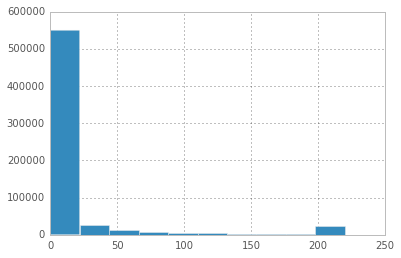

In [21]:
_ = df.course_material_engagement.hist()

### Save data to disk

In [22]:
df.to_csv("Edx_clean.csv")

# Correlation Analysis

In [23]:
df[["engagement", "days_ratio", "ndays_act"]].corr()

,engagement,days_ratio,ndays_act
engagement,1.000000,-0.012761,0.521110
days_ratio,-0.012761,1.000000,0.002766
ndays_act,0.521110,0.002766,1.000000


In [24]:
df[["gender2", "course_category", "university", "engagement"]].corr()

,gender2,course_category,university,engagement
gender2,1.000000,-0.246703,-0.152826,0.040087
course_category,-0.246703,1.000000,0.330680,-0.083902
university,-0.152826,0.330680,1.000000,-0.063927
engagement,0.040087,-0.083902,-0.063927,1.000000


In [25]:
r = df["ndays_act"].corr(df["engagement"], method='pearson')
fisher = lambda r: .5 * (np.log(1+r) - np.log(1-r))
print r, fisher(r)
#, "days_ratio", "ndays_act"]].cov(method='spearman')

0.521110308659 0.577862765994


In [26]:
from scipy.stats.stats import pearsonr
tmp = df[["ndays_act", "engagement"]].dropna()
r, p = pearsonr(tmp["ndays_act"].values, tmp["engagement"].values)
print r, p, fisher(r)

0.521110308659 0.0 0.577862765994


In [27]:
tmp = df[["grade", "engagement"]].dropna()
r, p = pearsonr(tmp["grade"].values, tmp["engagement"].values)
print r, p, fisher(r)

0.598926471994 0.0 0.691471477963


In [28]:
tmp = df[["gender2", "course_category"]].dropna()
r, p = pearsonr(tmp["gender2"].values, tmp["course_category"].values)
print r, p, fisher(r)

-0.246702951671 0.0 -0.251899035216


In [29]:
tmp = df[["gender2", "engagement"]].dropna()
r, p = pearsonr(tmp["gender2"].values, tmp["engagement"].values)
print r, p, fisher(r)

0.0400870247774 6.98265867628e-196 0.0401085183811


In [30]:
tmp = df[df["course_category"] == 1.0]
tmp = tmp[["gender2", "engagement"]].dropna()
r, p = pearsonr(tmp["gender2"].values, tmp["engagement"].values)
print r, p, fisher(r)

0.0226176331371 3.97374571048e-48 0.0226214910599


In [31]:
tmp = df[(df["university"] == 1.0).values * (df["course_category"] == 0).values]
tmp = tmp[["gender2", "engagement"]].dropna()
r, p = pearsonr(tmp["gender2"].values, tmp["engagement"].values)
print r, p, fisher(r)

0.0480294366392 2.74157650609e-14 0.0480664197045


In [32]:
tmp = df[df.university == 0]
tmp["engagement"].describe()

count    338223.000000
mean          1.571377
std           0.669118
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           4.000000
Name: engagement, dtype: float64

# Engagement Analysis

In [39]:
df.university.value_counts()

0    338223
1    302915
dtype: int64

In [33]:
import statsmodels.api as sm

### Multinomial Logistic Regression

In [34]:
cols_to_keep = ["gender2", "Education", "course_category", "university", "age"]
#gender_dummy = pd.get_dummies(df["gender"], prefix="gender")
#_dummy = pd.get_dummies(df["gender"], prefix="gender")
data = df[cols_to_keep]#.join(gender_dummy)
data = sm.add_constant(data)
#data.fillna(0.0, inplace=True)

In [35]:
model = sm.MNLogit(df["engagement"], data, missing='drop')
results = model.fit(method='ncg')

Optimization terminated successfully.
         Current function value: 0.885365
         Iterations: 17
         Function evaluations: 20
         Gradient evaluations: 36
         Hessian evaluations: 17


In [36]:
print results.summary()

                          MNLogit Regression Results                          
Dep. Variable:             engagement   No. Observations:               530041
Model:                        MNLogit   Df Residuals:                   530023
Method:                           MLE   Df Model:                           15
Date:                Tue, 26 May 2015   Pseudo R-squ.:                 0.01867
Time:                        15:33:29   Log-Likelihood:            -4.6928e+05
converged:                       True   LL-Null:                   -4.7821e+05
                                        LLR p-value:                     0.000
   engagement=2       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const               0.0445      0.014      3.274      0.001         0.018     0.071
gender2             0.1151      0.007     16.855      0.000         0.102     0.128
Education           0.0406      

In [34]:
results.pvalues

,0,1,2
const,1.060394e-03,0.000000e+00,0.000000e+00
gender2,9.639501e-64,5.830769e-39,8.744489e-21
Education,3.487381e-25,1.904316e-08,1.833345e-89
course_category,0.000000e+00,4.171694e-180,0.000000e+00
university,0.000000e+00,0.000000e+00,4.644675e-236
age,1.041434e-16,2.362160e-02,1.633416e-29


### Multivariate Regression 1

In [35]:
model = sm.OLS(df["grade"], data, missing='drop')
results = model.fit()

In [36]:
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                  grade   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     717.8
Date:                Thu, 11 Dec 2014   Prob (F-statistic):               0.00
Time:                        00:02:37   Log-Likelihood:            -2.1505e+06
No. Observations:              530041   AIC:                         4.301e+06
Df Residuals:                  530035   BIC:                         4.301e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const               2.0637      0.090     

In [37]:
results.pvalues

const              3.032840e-115
gender2             1.278067e-35
Education          1.037729e-139
course_category    8.736460e-211
university          0.000000e+00
age                 1.279031e-40
dtype: float64

### Multivariate Regression 2

In [38]:
cols_to_keep = ["engagement", "course_material_engagement", "ndays_act"]
data = df[cols_to_keep]
data = sm.add_constant(data)
model = sm.OLS(df["grade"], data, missing='drop')
results = model.fit()

In [39]:
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                  grade   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                 3.002e+05
Date:                Thu, 11 Dec 2014   Prob (F-statistic):               0.00
Time:                        00:02:47   Log-Likelihood:            -1.7705e+06
No. Observations:              478395   AIC:                         3.541e+06
Df Residuals:                  478391   BIC:                         3.541e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
const               

In [40]:
results.pvalues

const                         0
engagement                    0
course_material_engagement    0
ndays_act                     0
dtype: float64

### Multilevel Analysis

In [60]:
cols_to_keep =  ["grade", "gender2", "Education", "course_category", "university", "age"]
data = df[cols_to_keep]
data = sm.add_constant(data)
data = data.ix[np.arange(100000)]
data = data.dropna()

model = sm.MixedLM(data["grade"], data[cols_to_keep[1:]], groups=data["university"])
results = model.fit(do_cg=False)

       const  grade  gender2  Education  course_category  university  age
19329      1      0        0          2                1           0    2
19330      1      0        0          2                1           0   27
19331      1      0        1          2                1           0   46
19332      1      0        0          3                1           0   25
19333      1      0        0          4                1           0   36
19334      1      0        0          2                1           0   21
19335      1      0        0          3                1           0   26
19336      1      0        1          2                1           0   21
19337      1      0        0          4                1           0   33
19338      1      0        1          4                0           0   34
19339      1      0        1          4                0           0   34
19340      1      0        0          4                1           0   34
19341      1      0        0          

/usr/local/lib/python2.7/dist-packages/statsmodels/regression/mixed_linear_model.py:1676: ConvergenceWarning: Gradient optimization failed.
  warnings.warn(msg, ConvergenceWarning)


MemoryError: 

In [145]:
row_indices.keys()

[0, 1]

In [131]:
model.group_labels

AttributeError: 'OLS' object has no attribute 'group_labels'

In [124]:
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                  grade   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                 2.388e+05
Date:                Wed, 10 Dec 2014   Prob (F-statistic):               0.00
Time:                        23:30:45   Log-Likelihood:            -1.7612e+06
No. Observations:              478395   AIC:                         3.522e+06
Df Residuals:                  478390   BIC:                         3.522e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
const               